In [3]:
import pandas as pd
import os
import glob

In [8]:
ls

Sales_April_2019.csv      Sales_January_2019.csv    Sales_May_2019.csv
Sales_August_2019.csv     Sales_July_2019.csv       Sales_November_2019.csv
Sales_December_2019.csv   Sales_June_2019.csv       Sales_October_2019.csv
Sales_February_2019.csv   Sales_March_2019.csv      Sales_September_2019.csv


In [16]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('','./*.csv'))))

In [11]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Question 1 : what's the best month for sales ? how much was earned that month ?

In [12]:
#extracting months and converting them to numerical values
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

ValueError: invalid literal for int() with base 10: 'Or'

Clean up the data first by removing NaN (unecessary) values

In [13]:
nan_df = df[df.isna().any(axis =1)]

nan_df.head()
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Figure out the problem source, which mostly emanates from the cells format

In [21]:
df = df[df['Order Date'].str[0:2] != 'Or']

In [22]:
# Try again : extracting months and converting them to numerical values
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,New York City
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [24]:
df['Sales'] = pd.to_numeric(df['Quantity Ordered'])*df['Price Each']
#df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [25]:
results= df.groupby('Month').sum()

Text(0.5, 0, 'Month')

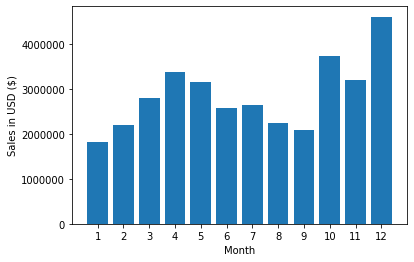

In [26]:
import matplotlib.pyplot as plt
 
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')

# Question 2 : what city had the highest number of sales ?

Add a city column, the challenge here is to extract city names from text format address columns. as a remedy, we can use .apply() method 

In [38]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2])
df = df.drop(columns = 'State')
df.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY 10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA 30301
...,...,...,...,...,...,...,...,...,...
95,295751,AAA Batteries (4-pack),1,2.99,12/29/19 11:03,"922 Hickory St, Los Angeles, CA 90001",12,2.99,Los Angeles CA 90001
96,295752,Google Phone,1,600.00,12/11/19 12:29,"341 Forest St, Dallas, TX 75001",12,600.00,Dallas TX 75001
97,295753,34in Ultrawide Monitor,1,379.99,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,379.99,Dallas TX 75001
98,295753,Lightning Charging Cable,1,14.95,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,14.95,Dallas TX 75001


In [44]:
results = df.groupby('City').sum()

results

,Price Each,Month,Sales
City,,,
Atlanta GA 30301,2.779908e+06,104794,2.795499e+06
Austin TX 73301,1.809874e+06,69829,1.819582e+06
Boston MA 02215,3.637410e+06,141112,3.661642e+06
Dallas TX 75001,2.752628e+06,104620,2.767975e+06
Los Angeles CA 90001,5.421435e+06,208325,5.452571e+06
New York City NY 10001,4.635371e+06,175741,4.664317e+06
Portland ME 04101,4.471893e+05,17144,4.497583e+05
Portland OR 97035,1.860558e+06,70621,1.870732e+06
San Francisco CA 94016,8.211462e+06,315520,8.262204e+06


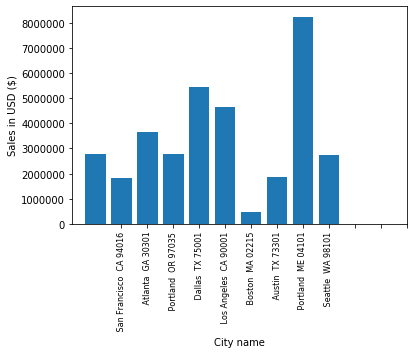

In [45]:
cities = df['City'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(months, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

In [ ]:
# as you can see, there are inconsistencies between the plotted data (sales ranking) 
# where Portland is the highestly ranked, and the data in the table where San Francisco has the highest sales
# The issue is that the order gets biased and different between x and y axis while plotting
# the solution to this is to organize the data by 'City' column to be the plotting parameter

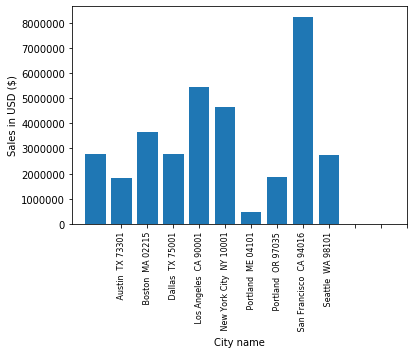

In [46]:
cities = [city for city, df in df.groupby('City')] # now we get the cities with their respective order

plt.bar(cities, results['Sales'])
plt.xticks(months, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

In [47]:
# it is clear tha San Fransisco has the highest sales rank, I would attribute that to the fact that it's
# Sillicon Valley, where the computer-ware business flourishes better than in other cities

# Question 3: What time should we display ads to get the highest-likely likelihood of sales ?

In [ ]:
## One of and simplestfashions is to look at the order date, plot the distribution
## of the purchase times and sort with an ascending order to get peak/rush hours, this would be our hint to maximise sales
## the most pythonic fashion to extract hour info is datetime library

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [51]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY 10001,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA 30301,12,38


In [70]:
df.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


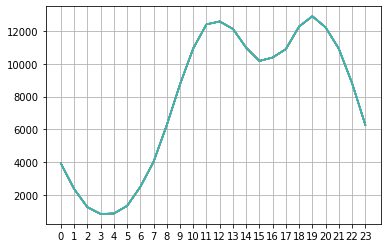

In [69]:
hour = [hour for hour, df, in df.groupby('Hour')]
plt.plot(hour, df.groupby('Hour').count())

plt.xticks(hour)
plt.grid()
plt.show()



I would recommend around 11 to 12 a.m. and 6 to 7 p.m.

## Question 4 : What products are most often sold together ?

One solution would be to grab the Order ID and join it to the Product name in one cell

In [83]:
df2 = df[df['Order ID'].duplicated(keep = False)]

df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df2[['Order ID', 'Grouped']].drop_duplicates() #removing products duplicates to prevent overcounts

df2.head()

/Users/Ghizlane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [84]:
#necessary import to count pair products
from itertools import combinations
from collections import Counter

In [92]:
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',') #splitting the results with a comma, and items paired in nested lists
    count.update(Counter(combinations(row_list,2))) #getting the 2 most sold combinations, we can adjust the num.
    
for key, value in count.most_common(10): #displaying the most commonly together-sold items
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
